In [1]:
from random import randint

import pyqtgraph as pg
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtCore import Qt
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
from matplotlib import pyplot as plt
from Agents.Boid import Boid
from Agents.Mountain import Mountain
from Agents.Predator import Predator
from tqdm import tqdm

In [12]:
time = 1000
size = 400

In [13]:
def cohesion(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(150)]
    mountains = [Mountain(xlim=size, ylim=size) for _ in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(4)]
    cohesion = []
    for t in tqdm(range(time)):
        tot = 0
        cohesion_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_cohesion = boid.cohension(boids)
            if boid_cohesion > 0:
                tot += boid_cohesion
                cohesion_num += 1
        tot /= len(boids)
        cohesion.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return cohesion

# def cohesionWithoutVisual(num):
#     boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(150)]
#     mountains = [Mountain(xlim=size, ylim=size) for _ in range(20)]
#     predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(4)]
#     cohesion = []
#     for t in tqdm(range(time)):
#         tot = 0
#         cohesion_num = 0
#         for boid in boids:
#             boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
#             boid_cohesion = boid.cohensionWithoutVisual(boids)
#             if boid_cohesion > 0:
#                 tot += boid_cohesion
#                 cohesion_num += 1
#         tot /= len(boids)
#         cohesion.append(tot)
#         for predator in predators:
#             predator.updatePredator(boids, 0, size, 0, size)
#     return cohesion

def alignment(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(150)]
    mountains = [Mountain(xlim=size, ylim=size) for _ in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(4)]
    alignment = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_alignment = boid.alignment(boids)
            if boid_alignment > 0:
                tot += boid_alignment
                alignment_num += 1
        tot /= len(boids)
        alignment.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return alignment

alignment_raw = alignment(0)
alignment_all = alignment(1)
alignment_pred = alignment(2)
alignment_mountain = alignment(3)

cohesion_raw = cohesion(0)
cohesion_all = cohesion(1)
cohesion_pred = cohesion(2)
cohesion_mountain = cohesion(3)

# cohesionWithoutVisual_raw = cohesionWithoutVisual(0)
# cohesionWithoutVisual_all = cohesionWithoutVisual(1)
# cohesionWithoutVisual_pred = cohesionWithoutVisual(2)
# cohesionWithoutVisual_mountain = cohesionWithoutVisual(3)

100%|██████████| 1000/1000 [00:42<00:00, 23.29it/s]


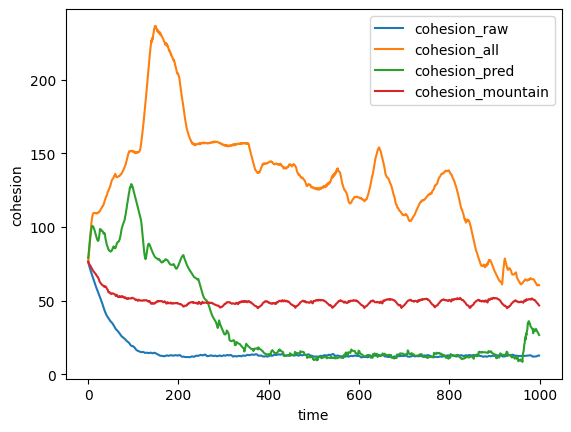

In [14]:
plt.plot(list(range(time)), cohesion_raw, label="cohesion_raw")
plt.plot(list(range(time)), cohesion_all, label="cohesion_all")
plt.plot(list(range(time)), cohesion_pred, label="cohesion_pred")
plt.plot(list(range(time)), cohesion_mountain, label="cohesion_mountain")
plt.xlabel("time")
plt.ylabel("cohesion")
plt.legend()
plt.show()

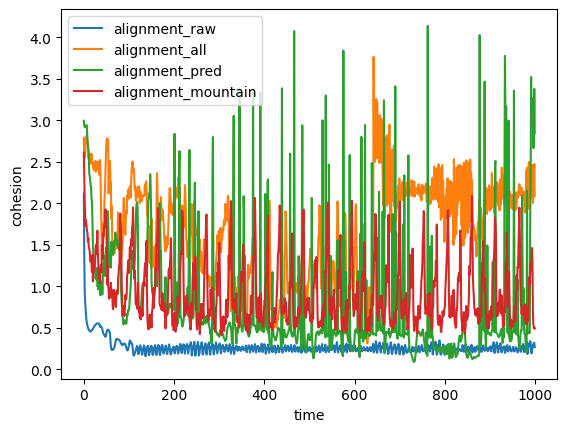

In [15]:
plt.plot(list(range(time)), alignment_raw, label="alignment_raw")
plt.plot(list(range(time)), alignment_all, label="alignment_all")
plt.plot(list(range(time)), alignment_pred, label="alignment_pred")
plt.plot(list(range(time)), alignment_mountain, label="alignment_mountain")
plt.xlabel("time")
plt.ylabel("cohesion")
plt.legend()
plt.show()

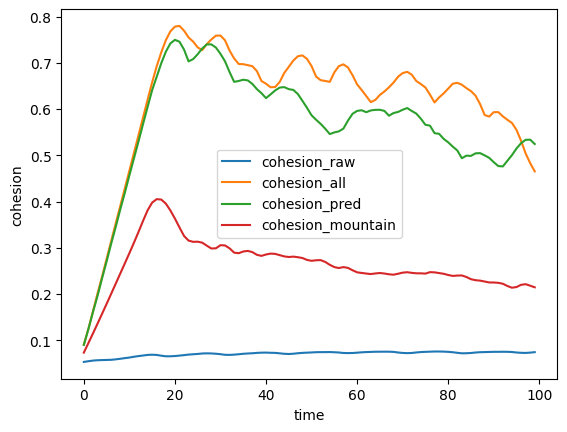

In [6]:
# plt.plot(list(range(time)), cohesionWithoutVisual_raw, label="cohesion_raw")
# plt.plot(list(range(time)), cohesionWithoutVisual_all, label="cohesion_all")
# plt.plot(list(range(time)), cohesionWithoutVisual_pred, label="cohesion_pred")
# plt.plot(list(range(time)), cohesionWithoutVisual_mountain, label="cohesion_mountain")
# plt.xlabel("time")
# plt.ylabel("cohesion")
# plt.legend()




In [16]:
def centeringPosition(num):
    boids = [Boid(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(150)]
    mountains = [Mountain(xlim=size, ylim=size) for _ in range(20)]
    predators = [Predator(xstr=size/3, ystr=size/3,xlim=size/2, ylim=size/2) for _ in range(4)]
    ceneteringPosX = []
    ceneteringPosY = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            X, Y = boid.centerPosition(boids)
            ceneteringPosX.append(X)
            ceneteringPosY.append(Y)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return ceneteringPosX, ceneteringPosY


In [17]:
ceneteringPosX_raw, ceneteringPosY_raw = centeringPosition(0)
ceneteringPosX_all, ceneteringPosY_all = centeringPosition(1)
ceneteringPosX_pred, ceneteringPosY_pred = centeringPosition(2)
ceneteringPosX_mountain, ceneteringPosY_mountain = centeringPosition(3)


100%|██████████| 1000/1000 [00:42<00:00, 23.50it/s]


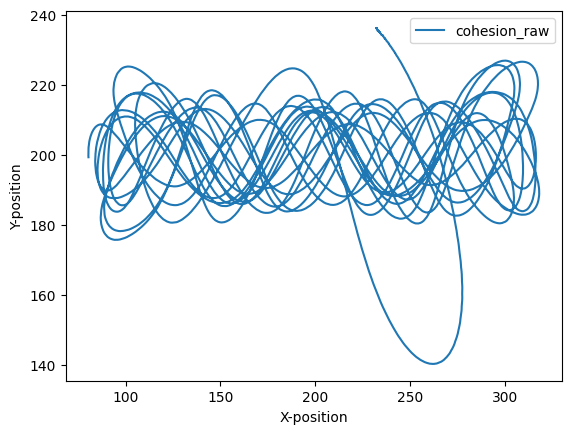

In [22]:
plt.plot(ceneteringPosX_raw, ceneteringPosY_raw, label="cohesion_raw")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.legend()

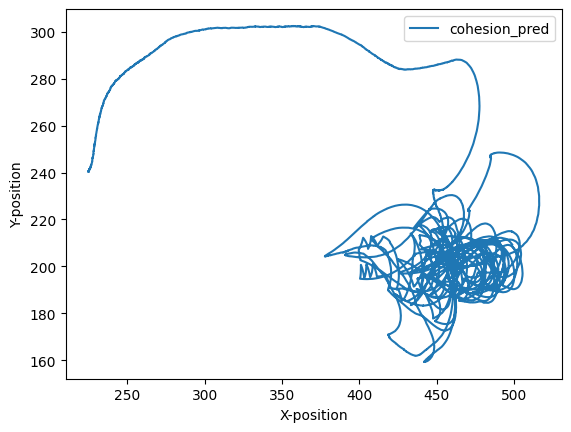

In [23]:
plt.plot(ceneteringPosX_pred, ceneteringPosY_pred, label="cohesion_pred")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.legend()

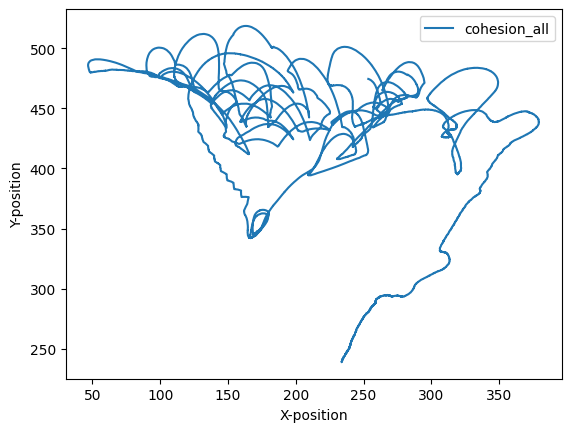

In [24]:
plt.plot(ceneteringPosX_all, ceneteringPosY_all, label="cohesion_all")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.legend()

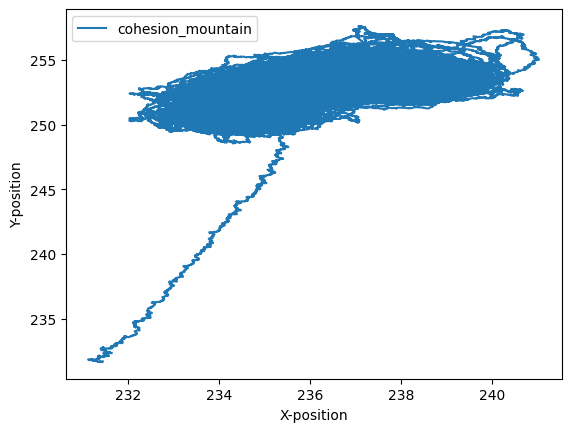

In [25]:

plt.plot(ceneteringPosX_mountain, ceneteringPosY_mountain, label="cohesion_mountain")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.legend()